### Dataset Downloading From kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats


In [68]:
import zipfile
import os

# Paths to the zip files
zip_files = ["dogs-vs-cats-original/test1.zip", "dogs-vs-cats-original/train.zip"]
output_directories = ["dogs-vs-cats-original/", "dogs-vs-cats-original/"]

for zip_file, output_dir in zip(zip_files, output_directories):
    if os.path.exists(zip_file):
        with zipfile.ZipFile(zip_file, 'r') as zip_ref:
            zip_ref.extractall(output_dir)
            print(f"Extracted '{zip_file}' to '{output_dir}'")
    else:
        print(f"File '{zip_file}' does not exist.")


Extracted 'dogs-vs-cats-original/test1.zip' to 'dogs-vs-cats-original/'
Extracted 'dogs-vs-cats-original/train.zip' to 'dogs-vs-cats-original/'


In [15]:
import pathlib
import os
import shutil

In [ ]:
base_dir = pathlib.Path('dogs-vs-cats')
src_dir = pathlib.Path('dogs-vs-cats-original/test')

In [73]:
def make_dataset_for_image_dataset_from_directory(subset_name, start_index, end_index):
    for category in ("dog", "cat"):
        dir = base_dir / subset_name / category
        #print(dir)
        if os.path.exists(dir) is False:
            os.makedirs(dir)
        files = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        #print(files)
        for i, file in enumerate(files):
            shutil.copyfile(src=src_dir / file, dst=dir / file)
            if i % 100 == 0: # show only once every 100
                print(f'src:{src_dir / file} => dst:{dir / file}')

In [76]:
make_dataset_for_image_dataset_from_directory('train', 0, 1000)

src:dogs-vs-cats-original\train\dog.0.jpg => dst:dogs-vs-cats\train\dog\dog.0.jpg
src:dogs-vs-cats-original\train\dog.100.jpg => dst:dogs-vs-cats\train\dog\dog.100.jpg
src:dogs-vs-cats-original\train\dog.200.jpg => dst:dogs-vs-cats\train\dog\dog.200.jpg
src:dogs-vs-cats-original\train\dog.300.jpg => dst:dogs-vs-cats\train\dog\dog.300.jpg
src:dogs-vs-cats-original\train\dog.400.jpg => dst:dogs-vs-cats\train\dog\dog.400.jpg
src:dogs-vs-cats-original\train\dog.500.jpg => dst:dogs-vs-cats\train\dog\dog.500.jpg
src:dogs-vs-cats-original\train\dog.600.jpg => dst:dogs-vs-cats\train\dog\dog.600.jpg
src:dogs-vs-cats-original\train\dog.700.jpg => dst:dogs-vs-cats\train\dog\dog.700.jpg
src:dogs-vs-cats-original\train\dog.800.jpg => dst:dogs-vs-cats\train\dog\dog.800.jpg
src:dogs-vs-cats-original\train\dog.900.jpg => dst:dogs-vs-cats\train\dog\dog.900.jpg
src:dogs-vs-cats-original\train\cat.0.jpg => dst:dogs-vs-cats\train\cat\cat.0.jpg
src:dogs-vs-cats-original\train\cat.100.jpg => dst:dogs-vs-cat

In [77]:
make_dataset_for_image_dataset_from_directory('test1', 1500, 2500)

src:dogs-vs-cats-original\train\dog.1500.jpg => dst:dogs-vs-cats\test1\dog\dog.1500.jpg
src:dogs-vs-cats-original\train\dog.1600.jpg => dst:dogs-vs-cats\test1\dog\dog.1600.jpg
src:dogs-vs-cats-original\train\dog.1700.jpg => dst:dogs-vs-cats\test1\dog\dog.1700.jpg
src:dogs-vs-cats-original\train\dog.1800.jpg => dst:dogs-vs-cats\test1\dog\dog.1800.jpg
src:dogs-vs-cats-original\train\dog.1900.jpg => dst:dogs-vs-cats\test1\dog\dog.1900.jpg
src:dogs-vs-cats-original\train\dog.2000.jpg => dst:dogs-vs-cats\test1\dog\dog.2000.jpg
src:dogs-vs-cats-original\train\dog.2100.jpg => dst:dogs-vs-cats\test1\dog\dog.2100.jpg
src:dogs-vs-cats-original\train\dog.2200.jpg => dst:dogs-vs-cats\test1\dog\dog.2200.jpg
src:dogs-vs-cats-original\train\dog.2300.jpg => dst:dogs-vs-cats\test1\dog\dog.2300.jpg
src:dogs-vs-cats-original\train\dog.2400.jpg => dst:dogs-vs-cats\test1\dog\dog.2400.jpg
src:dogs-vs-cats-original\train\cat.1500.jpg => dst:dogs-vs-cats\test1\cat\cat.1500.jpg
src:dogs-vs-cats-original\train\

In [89]:
make_dataset_for_image_dataset_from_directory('validation', 1000, 1500)

src:dogs-vs-cats-original\train\dog.1000.jpg => dst:dogs-vs-cats\validation\dog\dog.1000.jpg
src:dogs-vs-cats-original\train\dog.1100.jpg => dst:dogs-vs-cats\validation\dog\dog.1100.jpg
src:dogs-vs-cats-original\train\dog.1200.jpg => dst:dogs-vs-cats\validation\dog\dog.1200.jpg
src:dogs-vs-cats-original\train\dog.1300.jpg => dst:dogs-vs-cats\validation\dog\dog.1300.jpg
src:dogs-vs-cats-original\train\dog.1400.jpg => dst:dogs-vs-cats\validation\dog\dog.1400.jpg
src:dogs-vs-cats-original\train\cat.1000.jpg => dst:dogs-vs-cats\validation\cat\cat.1000.jpg
src:dogs-vs-cats-original\train\cat.1100.jpg => dst:dogs-vs-cats\validation\cat\cat.1100.jpg
src:dogs-vs-cats-original\train\cat.1200.jpg => dst:dogs-vs-cats\validation\cat\cat.1200.jpg
src:dogs-vs-cats-original\train\cat.1300.jpg => dst:dogs-vs-cats\validation\cat\cat.1300.jpg
src:dogs-vs-cats-original\train\cat.1400.jpg => dst:dogs-vs-cats\validation\cat\cat.1400.jpg


### Loading the Data

In [43]:
import tensorflow as tf

In [78]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'train',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [79]:
for data_batch, labels_batch in train_dataset:
    print(f'data batch shape: {data_batch.shape}')
    print(f'label batch shape: {labels_batch.shape}')
    print(f'labels: {labels_batch}')
    break

data batch shape: (32, 180, 180, 3)
label batch shape: (32,)
labels: [1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1]


In [93]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'test1',
    image_size=(180,180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.


In [92]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir / 'validation',
    image_size=(180,180),
    batch_size=32
)

Found 1000 files belonging to 2 classes.


In [82]:
import tensorflow as tf
from tensorflow.keras import layers

In [83]:
inputs = layers.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=16, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [84]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [85]:

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [86]:

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 16)      448       
                                                                 
 average_pooling2d (AverageP  (None, 89, 89, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        4640      
                                                                 
 average_pooling2d_1 (Averag  (None, 43, 43, 32)       0         
 ePooling2D)                                                 

In [94]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [95]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 12s 188ms/step - loss: 0.6864 - accuracy: 0.5605 - val_loss: 0.6787 - val_accuracy: 0.5700
Epoch 2/20
63/63 [==============================] - 11s 167ms/step - loss: 0.6454 - accuracy: 0.6190 - val_loss: 0.6712 - val_accuracy: 0.6410
Epoch 3/20
63/63 [==============================] - 11s 166ms/step - loss: 0.6281 - accuracy: 0.6725 - val_loss: 0.7102 - val_accuracy: 0.6100
Epoch 4/20
63/63 [==============================] - 11s 167ms/step - loss: 0.6034 - accuracy: 0.6925 - val_loss: 0.6114 - val_accuracy: 0.6600
Epoch 5/20
63/63 [==============================] - 11s 169ms/step - loss: 0.5647 - accuracy: 0.7065 - val_loss: 0.6870 - val_accuracy: 0.6150
Epoch 6/20
63/63 [==============================] - 11s 170ms/step - loss: 0.5437 - accuracy: 0.7195 - val_loss: 0.6349 - val_accuracy: 0.6450


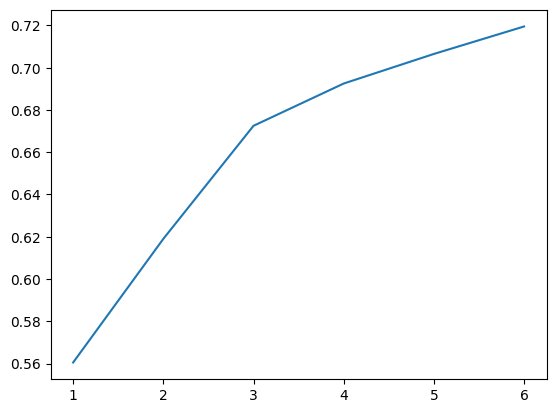

In [96]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [97]:
for test_batch, labels_batch in test_dataset:
    predictions = model.predict(test_batch)

1/1 [==============================] - 0s 73ms/step


In [98]:
predictions

array([[0.39206806],
       [0.24687344],
       [0.1895731 ],
       [0.45224404],
       [0.42586905],
       [0.22062758],
       [0.22540335],
       [0.42945397],
       [0.10901791],
       [0.5591797 ],
       [0.34281278],
       [0.3463964 ],
       [0.25817516],
       [0.43619153],
       [0.5238182 ],
       [0.0098532 ]], dtype=float32)

## With Data Augumentation

In [100]:
import tensorflow as tf
from tensorflow.keras import layers
import datetime

In [101]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

In [102]:
inputs = layers.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.AveragePooling2D(pool_size=2)(x)
#x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
#x = layers.AveragePooling2D(pool_size=2)(x)

x = layers.Flatten()(x)
x = layers.Dense(200, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

In [103]:
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [104]:

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 average_pooling2d_3 (Averag  (None, 89, 89, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                           

In [105]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [108]:

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [109]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.keras'),
    tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
]

In [110]:
history = model.fit(train_dataset, epochs=20, 
                    validation_data=validation_dataset, 
                    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 28s 423ms/step - loss: 0.7039 - accuracy: 0.5075 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 2/20
63/63 [==============================] - 26s 418ms/step - loss: 0.6941 - accuracy: 0.5105 - val_loss: 0.6929 - val_accuracy: 0.5050
Epoch 3/20
63/63 [==============================] - 26s 406ms/step - loss: 0.6804 - accuracy: 0.5345 - val_loss: 0.6685 - val_accuracy: 0.5590
Epoch 4/20
63/63 [==============================] - 27s 423ms/step - loss: 0.6830 - accuracy: 0.5285 - val_loss: 0.6890 - val_accuracy: 0.5000
Epoch 5/20
63/63 [==============================] - 27s 426ms/step - loss: 0.6881 - accuracy: 0.5150 - val_loss: 0.6800 - val_accuracy: 0.5750
Epoch 6/20
63/63 [==============================] - 26s 420ms/step - loss: 0.6859 - accuracy: 0.5455 - val_loss: 0.6727 - val_accuracy: 0.5990
Epoch 7/20
63/63 [==============================] - 26s 418ms/step - loss: 0.6814 - accuracy: 0.5485 - val_loss: 0.6747 - val_accuracy: 0.5810

In [111]:
acc = history.history['accuracy']
loss = history.history['loss']

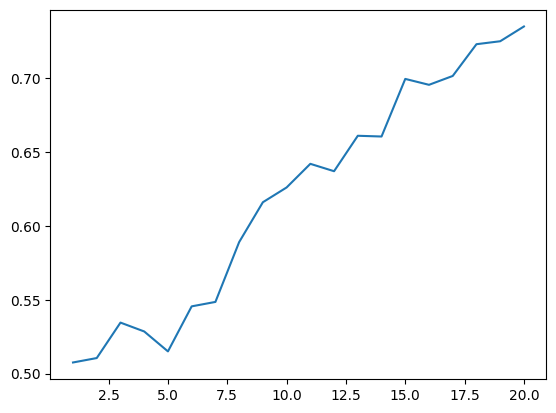

In [112]:

import matplotlib.pyplot as plt

plt.plot(range(1, len(acc)+1), acc, label='Traiing Acc')

In [113]:
%load_ext tensorboard

In [114]:

%tensorboard --logdir logs/fit

### Use Dogs_cats.py

In [5]:
from dogs_cats import DogsCats
dogs_cats = DogsCats()
dogs_cats.make_dataset_folders('train', 2400, 12000)
dogs_cats.make_dataset_folders('validation', 0, 2400)
dogs_cats.make_dataset_folders('test', 12000, 12500)


dogs-vs-cats-original\train\dog.2400.jpg => dogs-vs-cats\train\dog\dog.2400.jpg
dogs-vs-cats-original\train\dog.2500.jpg => dogs-vs-cats\train\dog\dog.2500.jpg
dogs-vs-cats-original\train\dog.2600.jpg => dogs-vs-cats\train\dog\dog.2600.jpg
dogs-vs-cats-original\train\dog.2700.jpg => dogs-vs-cats\train\dog\dog.2700.jpg
dogs-vs-cats-original\train\dog.2800.jpg => dogs-vs-cats\train\dog\dog.2800.jpg
dogs-vs-cats-original\train\dog.2900.jpg => dogs-vs-cats\train\dog\dog.2900.jpg
dogs-vs-cats-original\train\dog.3000.jpg => dogs-vs-cats\train\dog\dog.3000.jpg
dogs-vs-cats-original\train\dog.3100.jpg => dogs-vs-cats\train\dog\dog.3100.jpg
dogs-vs-cats-original\train\dog.3200.jpg => dogs-vs-cats\train\dog\dog.3200.jpg
dogs-vs-cats-original\train\dog.3300.jpg => dogs-vs-cats\train\dog\dog.3300.jpg
dogs-vs-cats-original\train\dog.3400.jpg => dogs-vs-cats\train\dog\dog.3400.jpg
dogs-vs-cats-original\train\dog.3500.jpg => dogs-vs-cats\train\dog\dog.3500.jpg
dogs-vs-cats-original\train\dog.3600.jpg

### Data Loaded From Directory using TF function

In [6]:
dogs_cats.make_dataset()


Found 19200 files belonging to 2 classes.
Found 4800 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


### Building the Model + Data Augumentation Enabled

In [7]:
dogs_cats.build_network(augmentation=True)
dogs_cats.model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

### Training

Epoch 1/20
600/600 [==============================] - 253s 420ms/step - loss: 0.6820 - accuracy: 0.5619 - val_loss: 0.6387 - val_accuracy: 0.6369
Epoch 2/20
600/600 [==============================] - 247s 411ms/step - loss: 0.6185 - accuracy: 0.6584 - val_loss: 0.5523 - val_accuracy: 0.7175
Epoch 3/20
600/600 [==============================] - 253s 421ms/step - loss: 0.5567 - accuracy: 0.7148 - val_loss: 0.5131 - val_accuracy: 0.7500
Epoch 4/20
600/600 [==============================] - 261s 435ms/step - loss: 0.5222 - accuracy: 0.7400 - val_loss: 0.4760 - val_accuracy: 0.7738
Epoch 5/20
600/600 [==============================] - 266s 443ms/step - loss: 0.4954 - accuracy: 0.7609 - val_loss: 0.4445 - val_accuracy: 0.7906
Epoch 6/20
600/600 [==============================] - 273s 455ms/step - loss: 0.4722 - accuracy: 0.7778 - val_loss: 0.4245 - val_accuracy: 0.8017
Epoch 7/20
600/600 [==============================] - 259s 431ms/step - loss: 0.4534 - accuracy: 0.7826 - val_loss: 0.4075 -

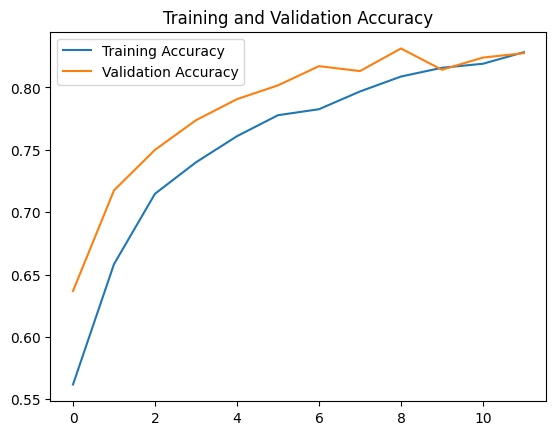

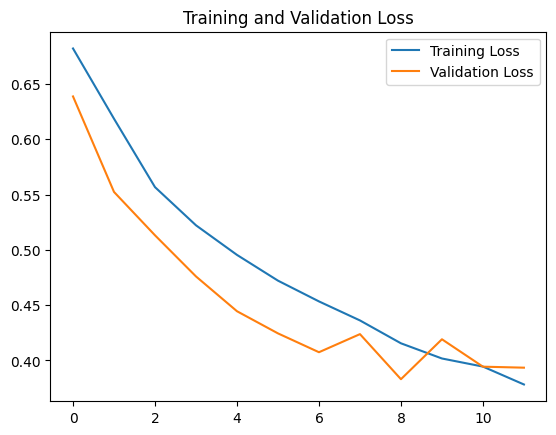

In [8]:
dogs_cats.train('model.dogs-cats.keras')


In [ ]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# Define the class names and validation directory
CLASS_NAMES = ['cat', 'dog']
VALIDATION_DIR = Path('dogs-vs-cats/Validation')  # Replace with the actual path if needed


# Load the pre-trained model
model = tf.keras.models.load_model('model.dogs-cats.keras')

def calculate_category_accuracy(validation_dir):
    """
    Calculates accuracy for each category in the validation directory.

    Args:
        validation_dir (Path): Path to the validation directory containing 'cat' and 'dog' folders.

    Returns:
        dict: Accuracy for each category.
    """
    accuracies = {}
    for category in ['cat', 'dog']:
        category_dir = validation_dir / category
        total_images = 0
        correct_predictions = 0

        for image_file in os.listdir(category_dir):
            if image_file.endswith(('.jpg', '.png', '.jpeg')):
                total_images += 1
                image_path = category_dir / image_file
                img = tf.keras.utils.load_img(image_path, target_size=(180, 180))
                img_array = tf.keras.utils.img_to_array(img)
                img_array = tf.expand_dims(img_array, axis=0)
                prediction = model.predict(img_array)[0][0]
                print(prediction)
                predicted_class = CLASS_NAMES[int(prediction > 0.5)]

                # Check if the prediction matches the actual category
                if predicted_class == category:
                    correct_predictions += 1

        # Calculate accuracy for the category
        accuracies[category] = correct_predictions / total_images if total_images > 0 else 0

    return accuracies

# Call the function and print the results
category_accuracies = calculate_category_accuracy(VALIDATION_DIR)
for category, accuracy in category_accuracies.items():
    print(f"Accuracy for {category}: {accuracy:.2%}")


In [19]:
for category, accuracy in category_accuracies.items():
    print(f"Accuracy for {category}: {accuracy:.2%}")


Accuracy for cat: 77.42%
Accuracy for dog: 87.04%
